<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final Project Submission</a></span></li><li><span><a href="#Import-nesecarry-libraries" data-toc-modified-id="Import-nesecarry-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import nesecarry libraries</a></span></li><li><span><a href="#Dataset-Prep" data-toc-modified-id="Dataset-Prep-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset Prep</a></span><ul class="toc-item"><li><span><a href="#Checking-for-invalid-images" data-toc-modified-id="Checking-for-invalid-images-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Checking for invalid images</a></span></li></ul></li><li><span><a href="#Execute-code-below" data-toc-modified-id="Execute-code-below-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Execute code below</a></span></li><li><span><a href="#Read-in-Data" data-toc-modified-id="Read-in-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Read in Data</a></span><ul class="toc-item"><li><span><a href="#What-is-the-distribution-across-the-categories?" data-toc-modified-id="What-is-the-distribution-across-the-categories?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>What is the distribution across the categories?</a></span></li><li><span><a href="#Calculate-number-of-images-in-train,-test-and-validation" data-toc-modified-id="Calculate-number-of-images-in-train,-test-and-validation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Calculate number of images in train, test and validation</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Create-keras-model" data-toc-modified-id="Create-keras-model-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Create keras model</a></span></li><li><span><a href="#Save-model" data-toc-modified-id="Save-model-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Save model</a></span></li><li><span><a href="#Visualize-training-history" data-toc-modified-id="Visualize-training-history-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Visualize training history</a></span></li><li><span><a href="#Evalute-test-data" data-toc-modified-id="Evalute-test-data-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Evalute test data</a></span></li></ul></li><li><span><a href="#Pre-Trained-Network-Part-1" data-toc-modified-id="Pre-Trained-Network-Part-1-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Pre-Trained Network Part 1</a></span><ul class="toc-item"><li><span><a href="#Fine-tuning-the-network" data-toc-modified-id="Fine-tuning-the-network-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Fine-tuning the network</a></span></li><li><span><a href="#Save-model" data-toc-modified-id="Save-model-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Save model</a></span></li><li><span><a href="#Visualize-training-history" data-toc-modified-id="Visualize-training-history-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Visualize training history</a></span></li><li><span><a href="#Evaluate-test-data" data-toc-modified-id="Evaluate-test-data-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Evaluate test data</a></span></li></ul></li><li><span><a href="#Pre-Trained-Network-Part-2" data-toc-modified-id="Pre-Trained-Network-Part-2-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Pre-Trained Network Part 2</a></span><ul class="toc-item"><li><span><a href="#Visualize-training-history" data-toc-modified-id="Visualize-training-history-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Visualize training history</a></span></li><li><span><a href="#Evaluate-test-data" data-toc-modified-id="Evaluate-test-data-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Evaluate test data</a></span></li></ul></li><li><span><a href="#Multi-label-classification-with-a-Multi-Output-Model" data-toc-modified-id="Multi-label-classification-with-a-Multi-Output-Model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Multi-label classification with a Multi-Output Model</a></span></li></ul></div>

# Final Project Submission

Please fill out:
* Student name: **Stephan Osterburg**
* Student pace: **Full Time**
* Scheduled project review date/time: **2/8/2019**
* Instructor name: **Rafael Carrasco**
* Blog post URL: 


# Import nesecarry libraries

In [6]:
import sys, os, shutil

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from tqdm import tqdm
from itertools import chain

# Printing models in ipynb
from PIL import Image
from scipy import ndimage
from keras.utils.vis_utils import model_to_dot, plot_model
from IPython.display import SVG

from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize

import tensorflow as tf

import keras
from keras import optimizers
from keras.applications import VGG16, VGG19
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import backend as K


import warnings
warnings.filterwarnings('ignore', category=Warning)
warnings.filterwarnings('ignore', category=UserWarning)

# OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized.
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

np.random.seed(42)

# Dataset Prep

The dataset contains two directories which can be compined. Also, there are some bad images (invalid) which we need to delete. While we are at it, we will re-orginize the directory structure a little bit and rename the images. This is just for us and not necessarily needed for keras. 

This is a one off and can be remove from the notebook. For the time being I will leave it in here for documentation. But shouldn't be executed again, otherwise we will just see errors.

In [5]:
%ls dataset/training_set/drawings/ | head -5

01dee7c857692cce250fcc7fba309f3f.jpg
1007036943.jpg*
10288_mainfoto_05.jpg
1601_mainfoto_05.jpg
167176.jpg


In [6]:
%ls musemart/training_set/drawings/ | head -5

01dee7c857692cce250fcc7fba309f3f.jpg
10288_mainfoto_05.jpg
1601_mainfoto_05.jpg
167176.jpg
1677_mainfoto_05.jpg


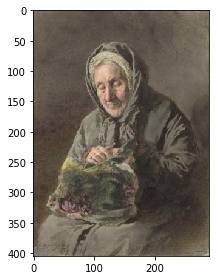

In [8]:
imshow('musemart/training_set/drawings/1677_mainfoto_05.jpg');

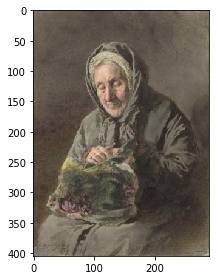

In [9]:
imshow('dataset/training_set/drawings/1677_mainfoto_05.jpg');

Looks like that we have duplicates in dataset and musemart.

In [10]:
src_dirs_0 = ['dataset', 'musemart']
src_dirs_1 = ['training_set', 'validation_set']
src_dirs_2 = ['sculpture', 'iconography', 'engraving', 'drawings', 'painting']

In [11]:
# copying files from musemart to dataset (merge data)
for sub_dir in src_dirs_1:
    for d in src_dirs_2:
        src_dir = src_dirs_0[1] + '/' + sub_dir + '/' + d
        files = os.listdir(src_dir)
        
        dst_dir = src_dirs_0[0] + '/' + sub_dir + '/' + d
        
        for file in files:
            shutil.copy(os.path.join(src_dir, file), os.path.join(dst_dir, file))

In [12]:
# Rename files to to something more simple
for sub_dir in src_dirs_1:
    for d in src_dirs_2:
        src_dir = src_dirs_0[0] + '/' + sub_dir + '/' + d
        files = os.listdir(src_dir)

        print('-' * 50)
        print('Renaming files in ' + src_dir + '\n')

        for i, file in enumerate(files):
            new_name = 'image.' + str(i) + '.jpg'
            os.rename(os.path.join(src_dir, file), os.path.join(src_dir, new_name))
#             print(os.path.join(src_dir, new_name))

--------------------------------------------------
Renaming files in dataset/training_set/sculpture

--------------------------------------------------
Renaming files in dataset/training_set/iconography

--------------------------------------------------
Renaming files in dataset/training_set/engraving

--------------------------------------------------
Renaming files in dataset/training_set/drawings

--------------------------------------------------
Renaming files in dataset/training_set/painting

--------------------------------------------------
Renaming files in dataset/validation_set/sculpture

--------------------------------------------------
Renaming files in dataset/validation_set/iconography

--------------------------------------------------
Renaming files in dataset/validation_set/engraving

--------------------------------------------------
Renaming files in dataset/validation_set/drawings

--------------------------------------------------
Renaming files in dataset/valid

In [13]:
# How many images do we have
for sub_dir in src_dirs_1:
    for d in src_dirs_2:
        src_dir = src_dirs_0[0] + '/' + sub_dir + '/' + d
        files = os.listdir(src_dir)
        print("Number of images in {}: {}".format(src_dir, len(files)))

Number of images in dataset/training_set/sculpture: 1894
Number of images in dataset/training_set/iconography: 2135
Number of images in dataset/training_set/engraving: 786
Number of images in dataset/training_set/drawings: 1127
Number of images in dataset/training_set/painting: 2359
Number of images in dataset/validation_set/sculpture: 240
Number of images in dataset/validation_set/iconography: 304
Number of images in dataset/validation_set/engraving: 110
Number of images in dataset/validation_set/drawings: 139
Number of images in dataset/validation_set/painting: 330


In [18]:
# Create test set directory
os.mkdir('dataset/test/')
         
for d in src_dirs_2:
    os.mkdir('dataset/test/' + d)

In [19]:
# Rename directories
shutil.move('dataset/training_set/', 'dataset/train')
shutil.move('dataset/validation_set/', 'dataset/validation')

'dataset/validation'

In [20]:
%ls dataset/*

dataset/test:
drawings/    engraving/   iconography/ painting/    sculpture/

dataset/train:
drawings/    engraving/   iconography/ painting/    sculpture/

dataset/validation:
drawings/    engraving/   iconography/ painting/    sculpture/


In [21]:
# Moving ~10% of the train data over to test
import math

for d in src_dirs_2:
    src_dir = 'dataset/train/' + d
    num = len(os.listdir(src_dir)) - math.floor(len(os.listdir(src_dir))*0.1)    
    images = [file for file in os.listdir(src_dir) if file.endswith('.jpg')]
    
    dst_dir = 'dataset/test/' + d
    test_img = images[num:]

    for file in test_img:
        shutil.copy(os.path.join(src_dir, file), os.path.join(dst_dir, file))

## Checking for invalid images

In [24]:
img_width, img_height = 128, 128
input_shape = (img_height, img_width, 1)

categories = ['drawings', 'engraving', 'iconography' ,'painting' ,'sculpture']

train_path = 'dataset/train/'
val_path = 'dataset/validation/'
test_path = 'dataset/test/'

In [31]:
count = 0

for path in [train_path, test_path, val_path]:
    for i, cat in enumerate(categories):
        cat_path = os.path.join(path, cat)
        images = [file for file in os.listdir(cat_path)]

        for image in images:
            try:
                img = Image.open(os.path.join(cat_path, image))
            except:
                count += 1

    print("Total bad images in {}: {}".format(path, str(count)))

Total bad images in dataset/train/: 113
Total bad images in dataset/test/: 122
Total bad images in dataset/validation/: 138


Assumging that we have in train, test and validation bad images, we shall remove them.

In [32]:
count = 0

for path in [train_path, test_path, val_path]:
    for i, cat in enumerate(categories):
        cat_path = os.path.join(path, cat)
        images = [file for file in os.listdir(cat_path)]

        for image in images:
            try:
                img = Image.open(os.path.join(cat_path, image))
            except:
                os.remove(os.path.join(cat_path, image))
                count += 1
                
    print("Removed {} bad images from {}".format(str(count), path))

Removed 113 bad images from dataset/train/
Removed 122 bad images from dataset/test/
Removed 138 bad images from dataset/validation/


---

# Execute code below

---

# Read in Data

Let's have a look at some of the images

In [9]:
img_width, img_height = 128, 128

categories = ['drawings', 'engraving', 'iconography' ,'painting' ,'sculpture']

train_path = 'dataset/train/'
val_path = 'dataset/validation/'
test_path = 'dataset/test/'

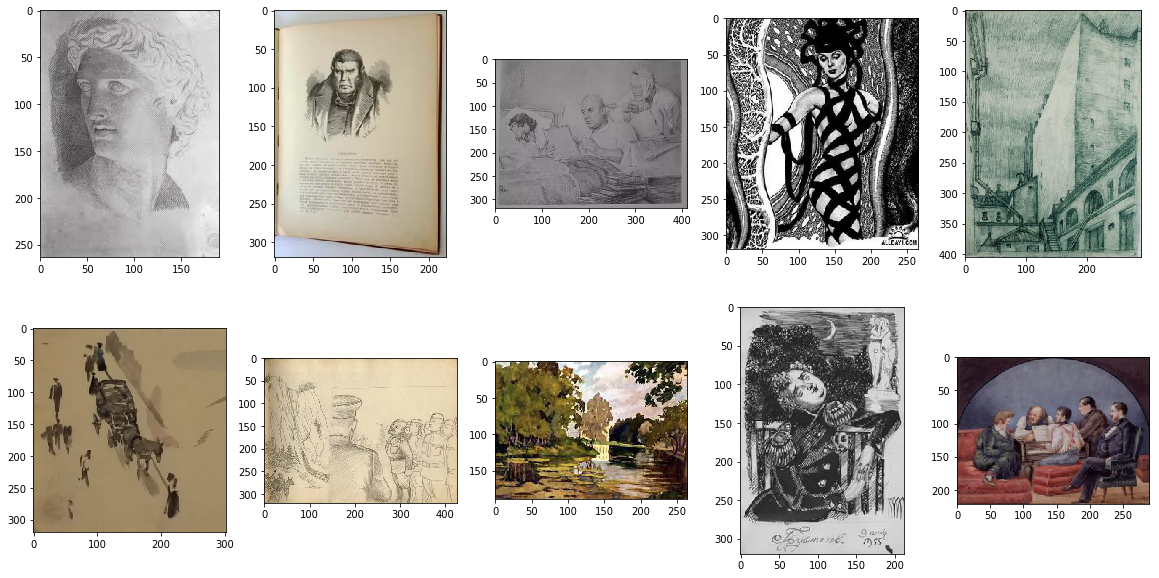

In [3]:
def show_images_for_art(art_type="drawings", num_pics=10):
    assert art_type in categories
    
    pic_dir = os.path.join(train_path, art_type)
    pic_files = [os.path.join(pic_dir, filename) for filename in os.listdir(pic_dir)]

    ncols = 5
    nrows = (num_pics - 1) // ncols + 1
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4))
    
    fig.set_size_inches((20, nrows * 5))
    ax = ax.ravel()
    
    for pic, ax in zip(pic_files[:num_pics], ax):
        img = imread(pic)
        ax.imshow(img, resample=True)
    
    plt.show();
    
show_images_for_art(art_type="drawings")

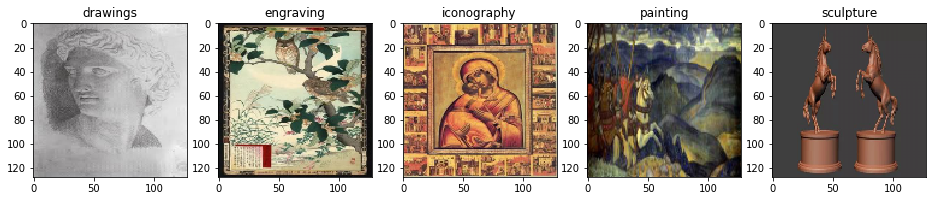

In [4]:
# Just have a look at the categories itself, one image shall be ok

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))

for i, cat in enumerate(categories):
    cat_path = os.path.join(train_path, cat)
    img_name = os.listdir(cat_path)[0]
    
    img = imread(os.path.join(cat_path, img_name))
    img = resize(img, (img_width, img_height, 3), mode='reflect')
    
    ax[i].imshow(img, resample=True)
    ax[i].set_title(cat)
    
plt.show();

## What is the distribution across the categories?

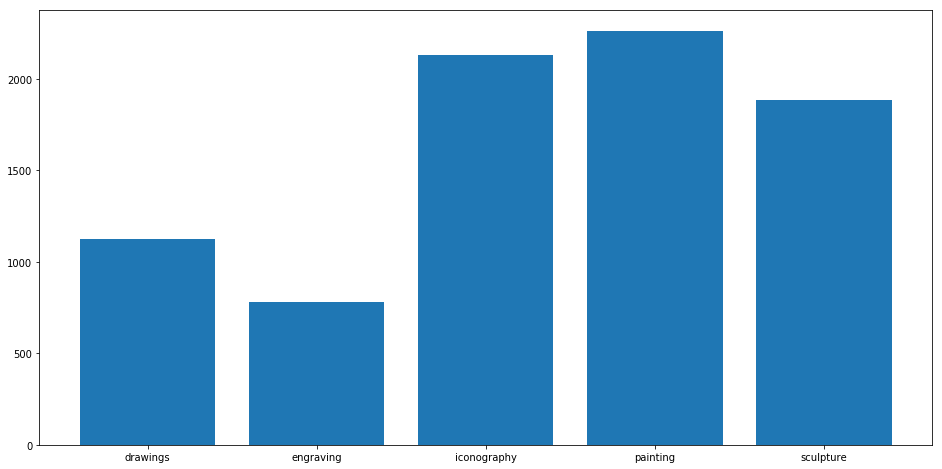

In [5]:
n_imgs = []
for cat in categories:
    files = os.listdir(os.path.join(train_path, cat))
    n_imgs += [len(files)]

plt.figure(figsize=(16, 8))
plt.bar([_ for _ in range(5)], n_imgs, tick_label=categories)
plt.show();

## Calculate number of images in train, test and validation

In [6]:
num_train_sample = 0
for i, cat in enumerate(categories):
    cat_path = os.path.join(train_path, cat)
    num_train_sample += len(os.listdir(cat_path))
    
print('Total number of training samples: {}'.format(num_train_sample))

Total number of training samples: 8188


In [7]:
num_test_sample = 0
for i, cat in enumerate(categories):
    cat_path = os.path.join(test_path, cat)
    num_test_sample += len(os.listdir(cat_path))
    
print('Total number of test samples: {}'.format(num_test_sample))

Total number of test samples: 818


In [8]:
num_validation_sample = 0
for i, cat in enumerate(categories):
    cat_path = os.path.join(val_path, cat)
    num_validation_sample += len(os.listdir(cat_path))
    
print('Total number of validation samples: {}'.format(num_validation_sample))

Total number of validation samples: 1107


# Preprocessing

Let's prepare the data using `flow_from_directory` to generate batches of image data (and labels) and resize all images to 128x128.

**Question**: should we preprocess the images for the pre-trained VGG network?

In [18]:
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

In [19]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

valid_generator = datagen.flow_from_directory(
        'dataset/validation',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = datagen.flow_from_directory(
        'dataset/test',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

Found 8188 images belonging to 5 classes.
Found 1107 images belonging to 5 classes.
Found 818 images belonging to 5 classes.


## Create keras model

In [4]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

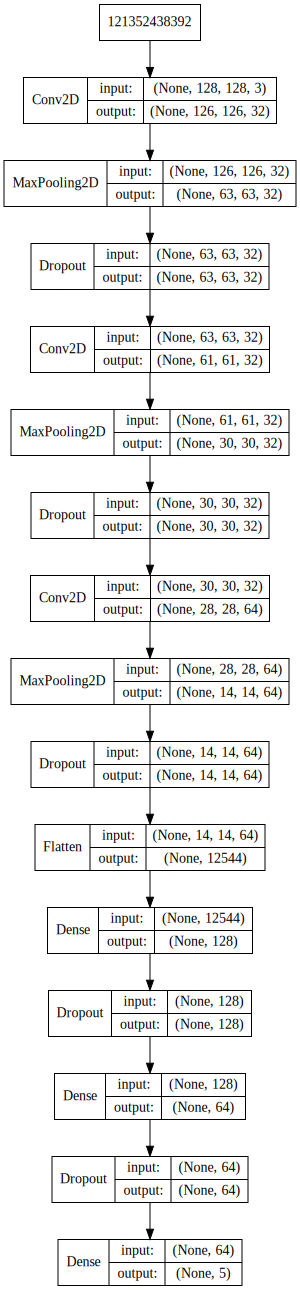

In [13]:
SVG(model_to_dot(model, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [14]:
%%time

train_result = model.fit_generator(
            train_generator,
            steps_per_epoch=num_train_sample // batch_size,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=num_validation_sample // batch_size)

Epoch 1/50
511/511 [==============================] - 153s 299ms/step - loss: 0.9968 - acc: 0.6133 - val_loss: 0.7319 - val_acc: 0.7509
Epoch 2/50
511/511 [==============================] - 147s 288ms/step - loss: 0.7261 - acc: 0.7387 - val_loss: 0.6942 - val_acc: 0.7452
Epoch 3/50
511/511 [==============================] - 147s 287ms/step - loss: 0.6411 - acc: 0.7789 - val_loss: 0.5595 - val_acc: 0.8121
Epoch 4/50
511/511 [==============================] - 145s 285ms/step - loss: 0.5869 - acc: 0.7941 - val_loss: 0.5767 - val_acc: 0.7846
Epoch 5/50
511/511 [==============================] - 146s 287ms/step - loss: 0.5583 - acc: 0.8028 - val_loss: 0.5428 - val_acc: 0.8002
Epoch 6/50
511/511 [==============================] - 145s 284ms/step - loss: 0.5303 - acc: 0.8152 - val_loss: 0.5482 - val_acc: 0.8020
Epoch 7/50
511/511 [==============================] - 158s 310ms/step - loss: 0.4877 - acc: 0.8244 - val_loss: 0.4725 - val_acc: 0.8341
Epoch 8/50
511/511 [============================

## Save model

In [15]:
model.save('CNN_base_run1.h5')

## Visualize training history

Let's display Loss and Accuravy

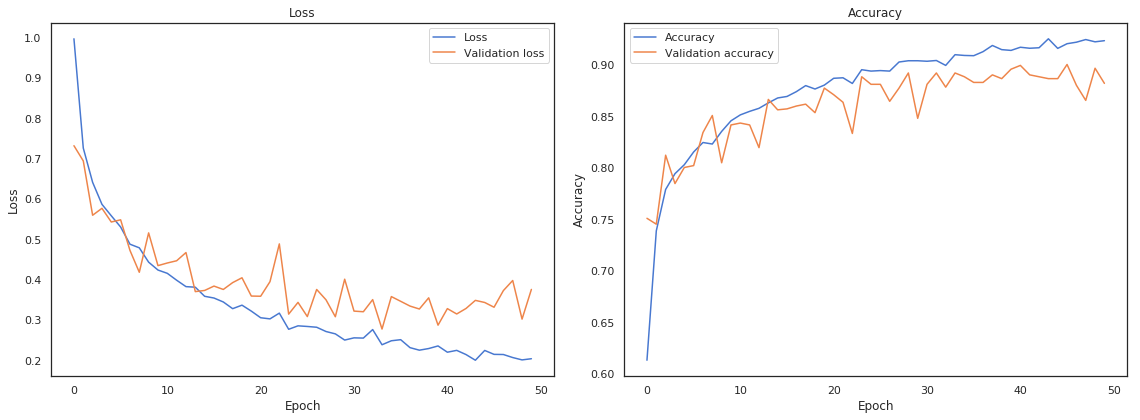

In [16]:
sns.set(style="white", palette="muted", color_codes=True)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

ax[0].plot(train_result.history['loss'], label="Loss")
ax[0].plot(train_result.history['val_loss'], label="Validation loss")
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_result.history['acc'], label="Accuracy")
ax[1].plot(train_result.history['val_acc'], label="Validation accuracy")
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.tight_layout()

plt.show();

## Evalute test data

In [17]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=32)
y_hat_test = model.predict_generator(test_generator, steps=32)

print('Generated {} predictions'.format(len(y_hat_test)))
print('Test accuracy: {:.2f}%'.format(test_acc * 100))

Generated 498 predictions
Test accuracy: 94.53%


# Pre-Trained Network Part 1

We can leverage a pre-trained network like the VGG19 architecture, which is pre-trained on the ImageNet dataset. Even so the ImageNet dataset contains only "cats" and "dogs" it can be used for a more generalized problem like the Art Images.

Here we will only instantiate the convolutional part of the model, everything up to the fully-connected layers. In our case we will freeze the layers of the VGG19 model. And only fine-tune the added layers.

To further improve the model we could make the last five nodes trainable. But that is for another time.

In [18]:
# Load the VGG19 network
vgg_model = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

## Fine-tuning the network 

In [19]:
model = Sequential([
    vgg_model,
    Flatten(),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

vgg_model.trainable = False

# Check what layers are trainable
for layer in model.layers:
    print(layer.name, layer.trainable)
    
# model.summary()

vgg19 False
flatten_2 True
dense_4 True
dense_5 True
dense_6 True
dense_7 True
dense_8 True


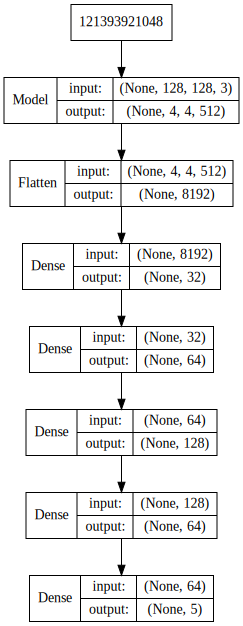

In [20]:
SVG(model_to_dot(model, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [29]:
%%time

# Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the Model
train_result = model.fit_generator(
            train_generator,
            steps_per_epoch=num_train_sample // 64,
            epochs=25,
            validation_data=validation_generator,
            validation_steps=num_validation_sample // 64,
            use_multiprocessing=True)

Epoch 1/25
127/127 [==============================] - 429s 3s/step - loss: 0.1931 - acc: 0.9360 - val_loss: 0.4028 - val_acc: 0.8687
Epoch 2/25
127/127 [==============================] - 422s 3s/step - loss: 0.2048 - acc: 0.9213 - val_loss: 0.2382 - val_acc: 0.9007
Epoch 3/25
127/127 [==============================] - 433s 3s/step - loss: 0.2234 - acc: 0.9203 - val_loss: 0.4712 - val_acc: 0.8713
Epoch 4/25
127/127 [==============================] - 433s 3s/step - loss: 0.1909 - acc: 0.9311 - val_loss: 0.2852 - val_acc: 0.8971
Epoch 5/25
127/127 [==============================] - 431s 3s/step - loss: 0.1775 - acc: 0.9277 - val_loss: 0.3751 - val_acc: 0.8750
Epoch 6/25
127/127 [==============================] - 430s 3s/step - loss: 0.2198 - acc: 0.9158 - val_loss: 0.2509 - val_acc: 0.9112
Epoch 7/25
127/127 [==============================] - 432s 3s/step - loss: 0.1932 - acc: 0.9247 - val_loss: 0.2736 - val_acc: 0.9118
Epoch 8/25
127/127 [==============================] - 430s 3s/step - 

## Save model

In [30]:
model.save('VGG19_Feature_Engineered.h5')

## Visualize training history

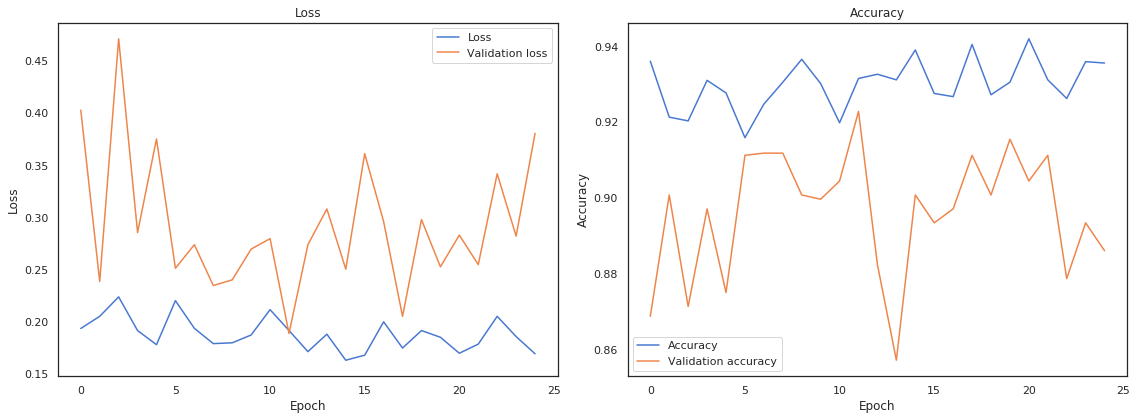

In [31]:
sns.set(style="white", palette="muted", color_codes=True)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

ax[0].plot(train_result.history['loss'], label="Loss")
ax[0].plot(train_result.history['val_loss'], label="Validation loss")
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_result.history['acc'], label="Accuracy")
ax[1].plot(train_result.history['val_acc'], label="Validation accuracy")
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.tight_layout()

plt.show();

## Evaluate test data

In [32]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=32, use_multiprocessing=True)
y_hat_test = model.predict_generator(test_generator, steps=32, use_multiprocessing=True)

print('Generated {} predictions'.format(len(y_hat_test)))
print('Test accuracy: {:.2f}%'.format(test_acc * 100))

Generated 498 predictions
Test accuracy: 92.37%


# Pre-Trained Network Part 2

As we did above we will use the pre-trained VGG19 network. Only this time we will run the model on our training and validation data once and record the output in two numpy arrays. Then we will train a small fully-connected model on top of the stored features.

The reason why we are storing the features offline rather than adding our fully-connected model directly on top of a frozen convolutional base and running the whole thing, is computational effiency. Running VGG16 is expensive, especially if you're working on CPU, and we want to only do it once. 

Note that this prevents us from using data augmentation.

In [10]:
# Load the VGG19 network
vgg_model = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

We will set the `class_mode` to `None`. The generator will only yield batches of image data, which is useful to use with `model.predict_generator()`. This means that the generator will only have batches of data and no labels.

In [30]:
%%time
datagen = ImageDataGenerator(rescale=1. / 255)

generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode=None,
    shuffle=False)

bottleneck_features_train = vgg_model.predict_generator(
    generator, 250, use_multiprocessing=True)

# Save the output as a numpy array
np.save(open('bottleneck_features_train.npy', 'wb'),
        bottleneck_features_train)

Found 8188 images belonging to 5 classes.
CPU times: user 12min 13s, sys: 4.85 s, total: 12min 18s
Wall time: 12min 18s


In [61]:
%%time
generator = datagen.flow_from_directory(
    val_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode=None,
    shuffle=False)

bottleneck_features_validation = vgg_model.predict_generator(
    generator, 30, use_multiprocessing=True)

# Save the output as a numpy array
np.save(open('bottleneck_features_validation.npy', 'wb'), 
        bottleneck_features_validation)

Found 1107 images belonging to 5 classes.
CPU times: user 2min 54s, sys: 1.74 s, total: 2min 56s
Wall time: 2min 54s


In [62]:
bottleneck_features_train.shape, bottleneck_features_validation.shape

((4000, 4, 4, 512), (960, 4, 4, 512))

In [33]:
train_data = np.load(open('bottleneck_features_train.npy', 'rb'))
train_labels = np.array([0] * 4000 + [1] * 4000)

validation_data = np.load(open('bottleneck_features_validation.npy', 'rb'))
validation_labels = np.array([0] * 480 + [1] * 480)

In [57]:
model = Sequential([
    Flatten(input_shape=train_data.shape[1:]),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [60]:
%%time
train_result = model.fit(train_data, train_labels,
                         epochs=epochs,
                         batch_size=batch_size,
                         validation_data=(validation_data, validation_labels)
                        )

ValueError: Input arrays should have the same number of samples as target arrays. Found 4000 input samples and 8000 target samples.

In [ ]:
model.save_weights('bottleneck_fc_model.h5')

## Visualize training history

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

ax[0].plot(train_result.history['loss'], label="Loss")
ax[0].plot(train_result.history['val_loss'], label="Validation loss")
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_result.history['acc'], label="Accuracy")
ax[1].plot(train_result.history['val_acc'], label="Validation accuracy")
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.tight_layout()

plt.show();

## Evaluate test data

In [ ]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=32)
y_hat_test = model.predict_generator(test_generator, steps=32)

print('Generated {} predictions'.format(len(y_hat_test)))
print('Test accuracy: {:.2f}%'.format(test_acc * 100))

# Multi-label classification with a Multi-Output Model

In [12]:
input_ = Input(shape = input_shape)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(input_)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(64, (3, 3), padding = 'same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output1 = Dense(1, activation = 'sigmoid')(x)
output2 = Dense(1, activation = 'sigmoid')(x)
output3 = Dense(1, activation = 'sigmoid')(x)
output4 = Dense(1, activation = 'sigmoid')(x)
output5 = Dense(1, activation = 'sigmoid')(x)

model = Model(input_,[output1, output2, output3, output4, output5])

model.compile(optimizers.rmsprop(lr = 0.0001, decay = 1e-6),
              loss = ["binary_crossentropy", "binary_crossentropy",
                      "binary_crossentropy", "binary_crossentropy",
                      "binary_crossentropy"], metrics=["accuracy"])

In [13]:
def generator_wrapper(generator):
    for batch_x,batch_y in generator:
        yield (batch_x,[batch_y[:,i] for i in range(5)])

In [29]:
STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n // valid_generator.batch_size
STEP_SIZE_TEST  = test_generator.n // test_generator.batch_size

model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)

Epoch 1/1
 - 479s - loss: 1.2387 - dense_8_loss: 0.2986 - dense_9_loss: 0.1764 - dense_10_loss: 0.2477 - dense_11_loss: 0.2115 - dense_12_loss: 0.3045 - dense_8_acc: 0.8802 - dense_9_acc: 0.9307 - dense_10_acc: 0.8989 - dense_11_acc: 0.9267 - dense_12_acc: 0.8723 - val_loss: 1.1824 - val_dense_8_loss: 0.2852 - val_dense_9_loss: 0.1998 - val_dense_10_loss: 0.2376 - val_dense_11_loss: 0.1883 - val_dense_12_loss: 0.2714 - val_dense_8_acc: 0.8850 - val_dense_9_acc: 0.9248 - val_dense_10_acc: 0.9076 - val_dense_11_acc: 0.9257 - val_dense_12_acc: 0.8786


In [26]:
test_generator.reset()

pred = model.predict_generator(test_generator,
                               steps=STEP_SIZE_TEST,
                               verbose=1)

51/51 [==============================] - 12s 242ms/step
